# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\дом\AppData\Local\Temp\ipykernel_23056\3107362156.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


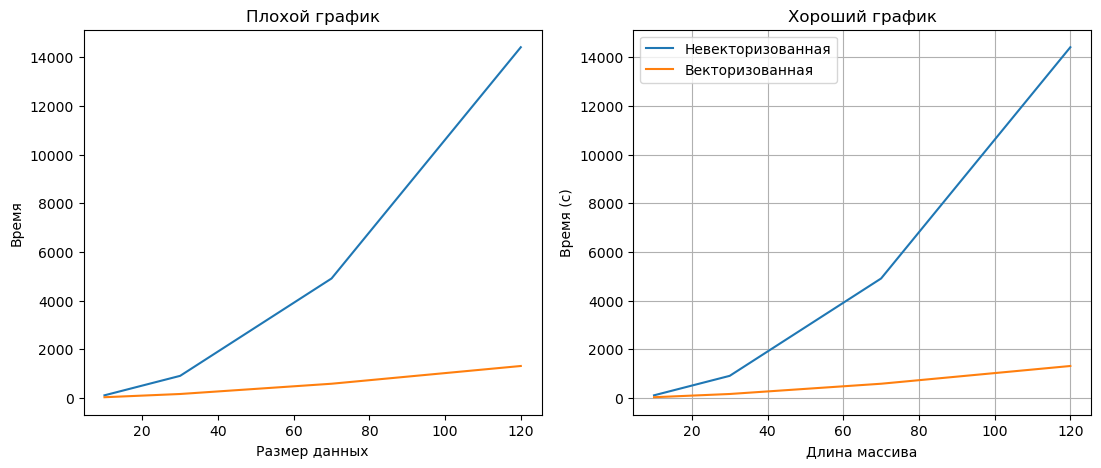

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

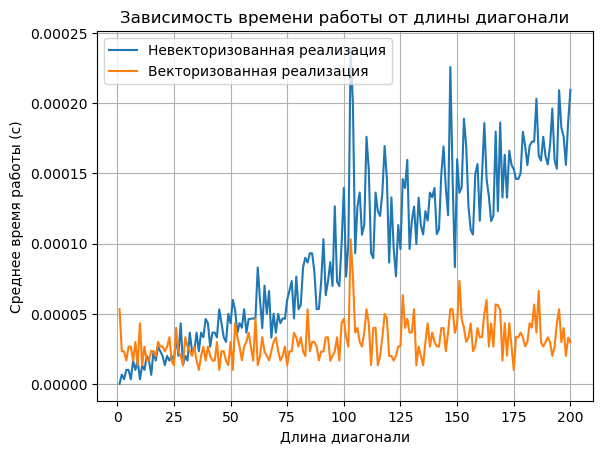

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random
import time

import functions as n_vec
import functions_vectorized as vec

CNT_ITER = 150
BOUND = 200
MAX_VAL = 5
data_size = [_ for _ in range(1, BOUND + 1)]
average_time_n_vec = []
average_time_vec = []
for len_diag in range(1, BOUND + 1):
    sum_time_n_vec = 0
    sum_time_vec = 0
    
    for _ in range(CNT_ITER):
        mat = np.random.rand(len_diag, random.randint(len_diag, BOUND)) * MAX_VAL
        
        beg_time = time.time()
        n_vec.prod_non_zero_diag(mat)
        sum_time_n_vec += time.time() - beg_time
        
        beg_time = time.time()
        vec.prod_non_zero_diag(mat)
        sum_time_vec += time.time() - beg_time
        
    for _ in range(CNT_ITER):
        mat = np.random.rand(random.randint(len_diag, BOUND), len_diag) * MAX_VAL
        
        beg_time = time.time()
        n_vec.prod_non_zero_diag(mat)
        sum_time_n_vec += time.time() - beg_time
        
        beg_time = time.time()
        vec.prod_non_zero_diag(mat)
        sum_time_vec += time.time() - beg_time
    
    average_time_n_vec.append(sum_time_n_vec / (2 * CNT_ITER))
    average_time_vec.append(sum_time_vec / (2 * CNT_ITER))

plt.plot(data_size, average_time_n_vec, label = "Невекторизованная реализация")
plt.plot(data_size, average_time_vec, label = "Векторизованная реализация")
plt.title("Зависимость времени работы от длины диагонали")
plt.xlabel("Длина диагонали")
plt.ylabel("Среднее время работы (с)")
plt.grid()
plt.legend()
plt.show()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


In [ ]:
# code here

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

In [ ]:
# code here

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


In [ ]:
# code here

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [ ]:
# code here

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [ ]:
# code here

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

In [ ]:
# code here